So, in this competition we have very small training dataset with only 250 samples and 300 continuous numeric features.
What we can do in this case? Something tells me that simplest model is best for that type of data, so let's try to keep it simple.


In [2]:
# Loading all necessary modules

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import interp
from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

pd.set_option('display.max_columns', 500)
%matplotlib inline

# ignore annoying warnings
warnings.filterwarnings('ignore')

In [3]:
# loading our data and taking a quick look at it

train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
train_df.head()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.410,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.250,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,-0.403,0.005,1.405,-0.044,-0.458,0.579,2.929,0.833,0.761,0.737,0.669,0.717,-1.542,-1.847,-0.445,1.238,-0.840,-1.891,-1.531,-0.396,-0.927,2.072,0.946,-1.105,0.008,0.933,-1.410,-0.770,1.740,-1.504,-0.391,-1.551,-1.415,-0.974,0.796,-2.464,-1.424,1.230,0.219,0.130,-0.371,-0.930,1.851,1.292,-0.380,1.318,1.146,-0.399,2.227,0.447,0.870,1.420,-1.675,0.019,0.060,0.768,2.563,0.638,1.164,0.407,-1.556,-0.903,1.329,0.452,-0.704,2.218,-1.844,0.158,-1.649,-0.172,-1.167,-1.456,-0.778,0.098,-1.627,0.405,-0.082,-0.797,-0.303,0.710,-0.252,1.920,0.706,-0.915,0.267,-0.607,0.966,-0.337,-2.292,-1.366,-1.085,0.278,0.212,1.260,-1.276,-2.013,-1.101,0.797,0.661,1.232,-0.632,-0.805,1.236,-1.085,-0.067,-0.661,-0.745,1.306,-0.010,-0.475,-0.613,-0.841,-0.837,0.671,2.493,0.689,0.946,0.160,-0.607,-0.775,1.688,0.302,-1.156,-0.718,0.126,0.745,-0.287,-0.565,0.646,-0.119,-0.675,-0.479,-0.191,-0.454,1.314,0.740,0.999,1.242,-0.339,0.403,-1.243,1.365,0.030,-0.475,0.860,0.036,1.313,-0.219,1.078,1.880,-0.317,-0.443,1.876,-0.611,0.892,1.435,-0.226,0.311,0.139,-0.075,1.381,1.716,-2.017,-0.485,1.906,-0.119,0.609,-0.564,0.264,-0.604,-0.733,-2.352,-1.661,0.498,-0.841,0.907,-0.476,0.817,1.372,1.187,0.844,0.028,0.029,-0.808,0.253,1.005,1.413,-0.133,0.655,-0.921,0.231,-1.902,-0.005,-1.730,1.132,-0.194,0.039,1.489,-0.328,0.966,-0.057,-0.181,0.723,-0.313,-0.165,-0.803,0.074,-2.851,-1.021,-0.894,0.967,0.218,-0.692,-0.514,0.754,-1.892,0.203,2.174,-0.755,-1.053,-0.516,-1.109,-0.681,1.250,-0.565,-1.318,-0.923,0.075,-0.704,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.100,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.540,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,0.411,-0.303,-0.307,0.380,0.503,-1.320,0.339,-1.102,-0.947,0.267,0.695,0.167,0.188,-1.082,-0.872,0.660,0.051,0.303,-0.553,-0.771,0.588,0.472,1.315,-0.467,-0.064,1.808,0.633,1.221,1.112,1.133,-0.543,-2.144,0.151,-0.813,1.966,-1.190,0.190,-0.473,0.002,1.195,-0.799,1.117,-0.759,-0.661,0.406,-0.846,-0.035,-1.634,-0.011,0.503,0.610,-1.822,-0.030,1.188,-0.006,-0.279,1.914,0.620,-1.495,1.787,-0.305,0.602,-1.208,0.893,0.379,1.396,0.581,-0.475,-0.056,-0.691,-0.783,-1.485,1.911,-2.400,-2.372,-0.178,1.550,-0.228,0.674,0.987,1.373,-0.373,0.629,0.229,-0.630,-0.175,0.548,0.074,-2.090,-0.625,-1.131,1.111,-0.100,0.574,-0.660,-1.113,0.802,-0.093,1.302,-0.395,0.745,-0.384,0.066,-0.756,0.495,-0.8

In [4]:
test_df.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,1.291,0.507,-0.317,1.848,-0.232,-0.340,-0.051,0.804,0.764,1.860,0.262,1.112,-0.491,-1.039,-0.492,0.183,-0.671,-1.313,0.149,0.244,1.072,-1.003,0.832,-1.075,1.988,1.201,-2.065,-0.826,-0.016,0.490,0.191,0.732,1.235,-0.867,-0.616,0.340,0.788,-0.044,0.305,-0.819,-0.447,-1.625,-1.005,-0.653,-0.371,1.556,0.754,-0.688,0.061,0.644,0.645,-0.222,-2.174,-0.610,-1.092,0.917,-1.010,-1.021,-0.179,1.732,-0.366,-1.694,1.038,-0.721,0.112,-0.783,0.940,-1.803,1.295,-1.031,0.452,1.198,-0.206,0.051,-1.055,1.740,-0.910,-0.509,-0.987,-1.011,0.718,0.375,0.101,0.137,-1.585,0.532,-1.201,1.210,-0.374,0.300,-0.110,-0.248,1.464,0.056,-0.038,-0.482,0.585,-1.263,0.993,-0.639,-1.337,0.225,1.640,-1.807,-1.983,-0.638,-0.432,1.890,0.506,1.091,-0.635,1.072,0.262,0.418,-1.294,0.868,0.728,0.618,0.540,1.981,-0.246,0.516,-0.373,0.954,-0.854,-1.241,-0.861,0.317,-0.611,-0.179,-1.658,-1.397,-0.988,-0.316,1.808,0.930,1.098,0.997,0.901,1.095,-0.464,2.592,0.846,1.060,-0.676,0.376,0.047,1.265,1.218,1.003,1.219,-0.624,-1.316,0.921,3.472,-1.123,0.037,0.927,-0.695,-0.046,0.270,0.847,-1.072,0.315,2.522,0.376,-0.015,-1.283,-0.650,-0.106,0.747,0.612,-0.838,0.713,0.048,-1.073,0.657,-0.542,-0.269,-0.482,0.329,0.534,0.337,0.118,-0.164,-0.538,-0.285,1.375,1.194,-0.258,-0.298,1.578,-0.488,1.424,1.106,0.363,-2.007,-0.091,0.551,0.388,0.422,0.099,0.378,-1.333,-1.102,2.145,0.745,0.345,-0.904,0.425,-0.273,0.547,-0.184,0.458,0.182,0.592,0.966,0.540,-1.382,0.069,0.131,-0.068,-0.400,0.413,-0.030,0.890,1.000,-0.774,0.340,2.345,2.748,0.774,-0.355,0.574,0.027,1.437,-0.877,0.532,-0.348,0.926,1.308,-0.120,-1.460,0.755,0.426,1.667,-0.264,1.266,0.962,1.285,1.176,0.824,0.928,1.372,1.505,0.645,0.641,-1.132,1.009,0.998,0.210,-1.634,1.046,0.114,-0.806,0.301,0.145,-0.684,0.794,-0.290,-1.688,0.313,1.140,0.447,-0.616,1.294,0.785,0.453,1.550,-0.866,1.007,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,1.356,-1.086,0.322,0.876,-0.563,-1.394,0.385,1.891,-2.107,-0.636,-0.055,-0.843,0.041,0.253,0.557,0.475,-0.839,-1.146,1.210,1.427,0.347,1.077,-0.194,0.323,0.543,0.894,1.190,0.342,-0.858,0.756,1.350,-0.414,0.748,2.014,0.858,0.025,1.343,0.784,-0.418,-0.515,0.694,-1.097,0.559,-0.799,-0.936,1.483,1.670,1.403,0.457,-1.564,0.049,0.550,-0.085,-0.561,-0.529,-1.563,-0.781,-0.532,0.375,-0.727,-0.053,-0.383,-0.123,1.573,-0.898,-0.070,0.811,-0.036,0.720,1.691,-0.673,-0.421,-1.665,0.099,0.089,2.032,-1.132,-1.827,-0.017,-1.748,-0.717,2.004,1.216,1.547,1.322,0.481,1.819,-0.809,0.617,-0.763,-0.154,-0.847,-0.981,0.274,-1.856,0.808,-0.599,0.998,-0.286,0.649,0.612,-1.002,1.258,0.149,0.252,1.093,-0.344,0.349,-1.386,-0.518,1.478,-1.261,2.206,-0.053,-1.191,-1.118,0.402,0.786,-0.345,-0.387,0.558,2.202,-2.056,1.502,1.191,-0.404,-2.183,1.559,1.077,-0.659,0.339,1.113,0.286,-0.424,-1.061,-0.748,-1.148,1.705,1.239,-0.912,-0

In [5]:
print('Train_df shape: ', train_df.shape)
print('Test_df shape: ', test_df.shape)

Train_df shape:  (250, 302)
Test_df shape:  (19750, 301)


We see that we have only continuous variables, and we don't know what this features mean. Let's try to gather more information about our data.

In [6]:
train_df.describe()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.00000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0

We can see interesting things here:
 - mean value of features is about 0
 - standard deviation of features is about 1
 - looks like data is scaled

 Let's look at correlation:

In [7]:
corr = train_df.corr()['target'].sort_values(ascending = False)

In [8]:
corr.head(20)

target    1.000000
33        0.373608
65        0.293846
24        0.173096
183       0.164146
199       0.159442
201       0.142238
30        0.132705
289       0.127213
114       0.124792
164       0.124151
101       0.118379
272       0.113909
226       0.113660
17        0.110998
105       0.110589
0         0.108966
244       0.108147
13        0.107828
176       0.099790
Name: target, dtype: float64

In [9]:
corr.tail(20)

134   -0.133731
220   -0.134738
298   -0.134760
90    -0.136230
230   -0.136263
258   -0.138332
133   -0.139100
129   -0.139439
165   -0.142526
39    -0.142915
16    -0.144267
194   -0.150384
id    -0.151498
189   -0.155956
80    -0.162558
73    -0.167557
295   -0.170501
91    -0.192536
117   -0.197496
217   -0.207215
Name: target, dtype: float64

We see that not too much fetures really significant in this data, and we need to do something to get rid of unsignificant features. So, let's start modelling.

In [10]:
Y_train = train_df['target']
X_train = train_df.drop(['target', 'id'], axis = 1)
X_test = test_df.drop('id', axis = 1)

print(Y_train.shape)
print(X_train.shape)
print(X_test.shape)

(250,)
(250, 300)
(19750, 300)


Let's return to our features, we saw, that we need to reduce complexity of our model, so we need an algorithm with regularization, that can make a lot of work for us. During experiments, I stopped on logistic regression with L1 regularization, so lets train and tune it.

In [11]:
log = LogisticRegression(penalty = 'l1', random_state = 42)

# Setting parameters for GridSearchCV
params = {'solver': ['liblinear', 'saga'], 
          'C': [0.001, 0.1, 1, 10, 50], 
          'tol': [0.00001, 0.0001, 0.001, 0.005], 
          'class_weight': ['balanced', None]}

log_gs = GridSearchCV(log, params, cv = StratifiedKFold(n_splits = 5), verbose = 1, n_jobs = -1, scoring = 'roc_auc')

# Fitting our model
log_gs.fit(X_train, Y_train)

# Looking for best estimator
log_best = log_gs.best_estimator_

print(log_best)
print(log_gs.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.5s


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
0.8180555555555555


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   23.1s finished


We see that our model gives us 0.818 auc score, not bad, but lets take a look on learning curves.

In [12]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

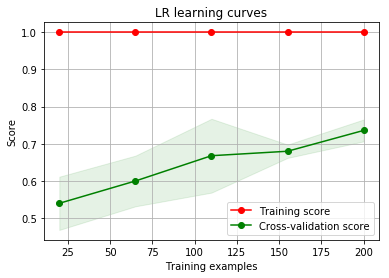

In [13]:
g = plot_learning_curve(log_best,"LR learning curves",X_train,Y_train,cv=StratifiedKFold(n_splits = 5))

We see that Training score = 100, but cv_score is far away from training score. It looks like overfitting and we still need to reduce complexity of our model.
C - parameter that responsible for level of regularization, if we reduce its value - we increase level of regularization, so this is the main parameter that we need to tune.

Let's also take a look at ROC curves:

In [14]:
def plot_roc(clf, X = X_train, y = Y_train, n = 6):
    '''Plotting ROC curves with cross validation'''
    
    cv = StratifiedKFold(n_splits=n)
    classifier = clf

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    plt.figure(figsize = (8, 7))
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

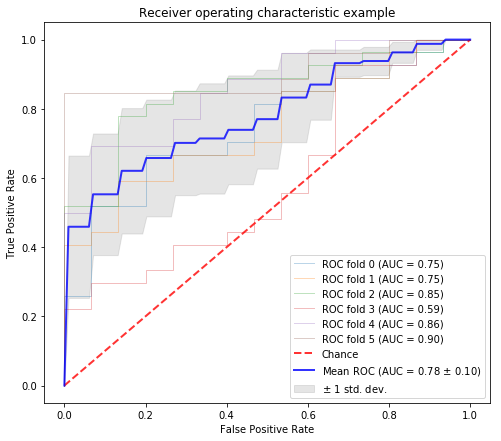

In [15]:
plot_roc(log_best)

After some experiments, I stopped on next parameters: 
penalty='l1', class_weight='balanced', C=0.1, solver='saga', random_state = 42

Lets plot learning curves for new model

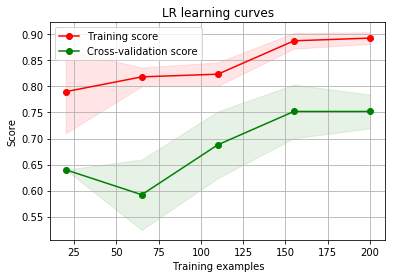

In [16]:
log_p = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='saga', random_state = 42)
g = plot_learning_curve(log_p,"LR learning curves",X_train,Y_train,cv=StratifiedKFold(n_splits = 5))

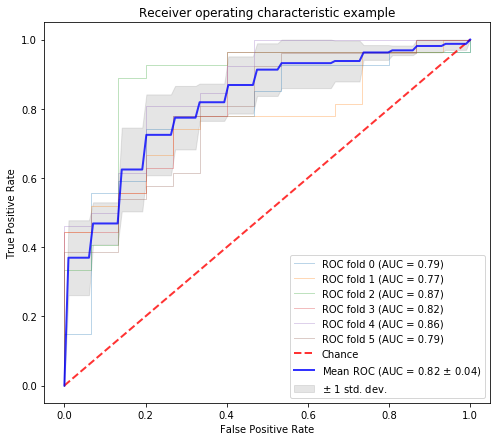

In [17]:
plot_roc(log_p)

In [18]:
# This model will give us 0.847 public score

log_p.fit(X_train, Y_train)
log_preds = log_p.predict_proba(X_test)[:, 1]

# predict_proba returns 2-dimensional array, where 1st value is a probability that target value = 0,
# 2nd value - probability that target value = 1, we need only 2nd values.

In [ ]:
# Prepairing submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'target': log_preds
})

submission.to_csv('submission.csv', index = False)